# 统计文章二元词组
这篇 文章https://github.com/OpenMindClub/DeepLearningStartUp/blob/master/happiness_seg.txt 中，出现频率最高的前 10 个「二元词组」，并输出它们的频率。「二元词组」即文章中所有接连出现的两个词，如「今天 天气 不错」有「今天 天气」，「天气 不错」两个「二元词组」。

In [1]:
from nltk.book import *
from __future__ import division
import nltk,re,pprint
from urllib.request import urlopen
import re

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
# 从链接地址取得文本
url=r'https://raw.githubusercontent.com/OpenMindClub/DeepLearningStartUp/master/happiness_seg.txt'
raw = urlopen(url).read()
raw = raw.decode('utf-8')
# 测试原始文本长度
len(raw)

674947

In [3]:
raw[:100] # 取前1000个字符

'\n\n幸福之路\n第一章 \u3000 什么 使人 不幸\n\n\n动物 只要 不患 疾病 ， 食物 充足 ， 就 会 快乐 满足 。 人 也 应该 如此 ； 然而 现实 并非 这样 ， 至少 在 大多数 情况 下 并非'

### 由以上文本可知，需要对原始文本进行分割。因为文本已经有空格进行好的分词，因此只需要通过空格分割文本即可

In [4]:
spl = re.split(r'[ \t\n]',raw) # 进行文本切割
spl[:25] 

['',
 '',
 '幸福之路',
 '第一章',
 '\u3000',
 '什么',
 '使人',
 '不幸',
 '',
 '',
 '动物',
 '只要',
 '不患',
 '疾病',
 '，',
 '食物',
 '充足',
 '，',
 '就',
 '会',
 '快乐',
 '满足',
 '。',
 '人',
 '也']

### 下面统计出现的二元词组

In [6]:
from nltk import bigrams
list(bigrams(spl[:25])) # 统计出现的二元词组

[('', ''),
 ('', '幸福之路'),
 ('幸福之路', '第一章'),
 ('第一章', '\u3000'),
 ('\u3000', '什么'),
 ('什么', '使人'),
 ('使人', '不幸'),
 ('不幸', ''),
 ('', ''),
 ('', '动物'),
 ('动物', '只要'),
 ('只要', '不患'),
 ('不患', '疾病'),
 ('疾病', '，'),
 ('，', '食物'),
 ('食物', '充足'),
 ('充足', '，'),
 ('，', '就'),
 ('就', '会'),
 ('会', '快乐'),
 ('快乐', '满足'),
 ('满足', '。'),
 ('。', '人'),
 ('人', '也')]

## 但我们会发现，前面有的二元词组包括标点符号，因此还需要清洗

In [9]:
w1 = '，'
w2 = '。'
w3 = '―'
w4 = '；'
w5 = '：'
w6 = ''

list1 = list(bigrams(spl))
listx = list1
listn = list1
l = len(list1)
m = 0

for i in range(0,l-1):
    c1 = (w1 in listx[i][0]) or (w1 in listx[i][1]) or (w2 in listx[i][0]) or (w2 in listx[i][1])
    c2 = (w3 in listx[i][0]) or (w3 in listx[i][1]) or (w4 in listx[i][0]) or (w4 in listx[i][1])
    c3 = (w5 in listx[i][0]) or (w5 in listx[i][1]) or (w6 in listx[i][0]) or (w6 in listx[i][1])
    if not (c1 or c2):
            if listx[i] != ('', ''):
                listn[m] = listx[i] 
                m = m + 1


In [10]:
# 取前10频率最高词组
Flist2 = FreqDist(listn)
Flist2.most_common(10) 

[(('的', '人'), 1117),
 (('他', '的'), 606),
 (('自己', '的'), 544),
 (('上', '的'), 474),
 (('他们', '的'), 416),
 (('人', '的'), 352),
 (('的', '时候'), 351),
 (('的', '孩子'), 293),
 (('就', '会'), 278),
 (('的', '东西'), 268)]

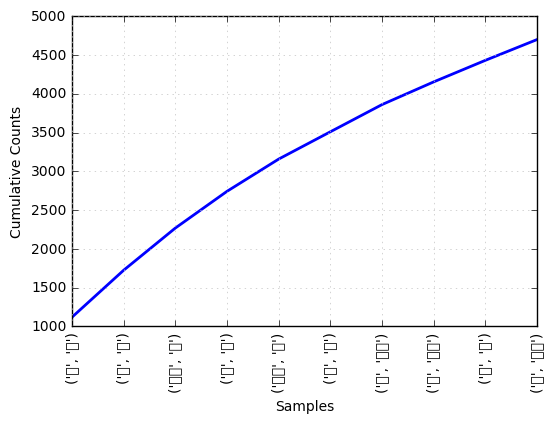

In [16]:
import warnings
Flist2.plot(10,cumulative = True)  ## 画下前10个二元词组的累积词频